In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import keras
from keras.models  import Sequential
from keras.layers  import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
import os
import cv2

In [3]:
path1=r"E:\mask_nomask"
cate=["mask","no_mask"]

In [4]:
image_size=200
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)                              #access folder
    label=cate.index(i)                                        # telling software which image is of masked and which of no_mask
    print("value of label is",label)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)                 #access images in file
        image_array=cv2.imread(image_path)                     # using cv2 i am reading image and storing in variable image_array
        image_array=cv2.resize(image_array,(image_size,image_size))#re-sizeing image
        input_image.append([image_array,label])

value of label is 0
value of label is 1


In [5]:
len(input_image)

576

In [6]:
input_image[0]

[array([[[ 38,  35,  21],
         [ 38,  35,  21],
         [ 38,  35,  21],
         ...,
         [154, 149, 122],
         [192, 188, 160],
         [192, 188, 160]],
 
        [[ 38,  35,  21],
         [ 38,  35,  21],
         [ 38,  35,  21],
         ...,
         [147, 142, 115],
         [182, 178, 150],
         [182, 178, 150]],
 
        [[ 38,  35,  21],
         [ 38,  35,  21],
         [ 38,  35,  21],
         ...,
         [132, 127, 101],
         [162, 157, 132],
         [162, 157, 132]],
 
        ...,
 
        [[ 33,  25,   9],
         [ 33,  25,   9],
         [ 35,  27,  11],
         ...,
         [ 10,  14,  11],
         [  7,  12,   9],
         [  7,  12,   9]],
 
        [[ 34,  26,  11],
         [ 34,  26,  11],
         [ 36,  27,  12],
         ...,
         [ 13,  16,  12],
         [ 12,  17,  12],
         [ 12,  17,  12]],
 
        [[ 35,  26,  12],
         [ 35,  26,  12],
         [ 36,  27,  13],
         ...,
         [ 14,  17,  13],
  

In [7]:
input_image[500]

[array([[[ 63,  90, 104],
         [ 63,  90, 104],
         [ 64,  91, 105],
         ...,
         [ 24,  28,  57],
         [ 23,  27,  56],
         [ 23,  27,  56]],
 
        [[ 62,  89, 103],
         [ 63,  90, 104],
         [ 63,  90, 104],
         ...,
         [ 25,  29,  57],
         [ 24,  28,  56],
         [ 24,  28,  56]],
 
        [[ 62,  89, 103],
         [ 62,  89, 103],
         [ 63,  90, 104],
         ...,
         [ 24,  30,  55],
         [ 24,  29,  55],
         [ 23,  29,  55]],
 
        ...,
 
        [[110, 140, 204],
         [103, 134, 198],
         [ 94, 124, 188],
         ...,
         [239, 230, 230],
         [241, 231, 231],
         [242, 231, 232]],
 
        [[108, 137, 203],
         [102, 132, 198],
         [ 95, 124, 190],
         ...,
         [242, 229, 229],
         [242, 229, 229],
         [243, 229, 230]],
 
        [[107, 136, 203],
         [103, 131, 199],
         [ 96, 125, 192],
         ...,
         [242, 229, 227],
  

In [15]:
#shuffling image to reduce order bias
np.random.shuffle(input_image)

In [16]:
#till this point x & y values are together, lets seprate them
x=[]
y=[]
for x_values,labels in input_image:
    x.append(x_values)
    y.append(labels)

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
x.shape

(576, 200, 200, 3)

In [19]:
y.shape

(576,)

In [20]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

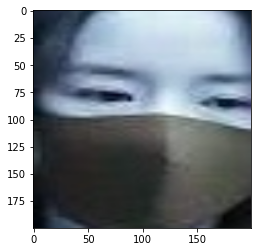

In [25]:
plt.imshow(x[3])

In [26]:
np.unique(y)

array([0, 1])

In [27]:
#normalizing x 
x=x/255

In [38]:
x.shape

(576, 200, 200, 3)

In [32]:
model1=Sequential()                                               #initialaze the model

model1.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu"))#convolutional layer
model1.add(MaxPool2D(pool_size=(2, 2)))                           #pooling layer

model1.add(Flatten())                                             # flattening data

model1.add(Dense(128,activation="relu",input_shape=x.shape[1:]))  #fully connected layer

#model1.add(Dropout(0.2))                                         #to avoid overfitting
model1.add(Dense(2,activation="softmax"))                         #output layer
adam=tf.keras.optimizers.Adam(lr=0.02)                            #assigning learning rate
model1.compile(optimizer=adam,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [31]:
model1.fit(x,y, epochs=15,validation_split=0.2,batch_size=64)

Epoch 1/15
8/8 [==============================] - 33s 3s/step - loss: 9.6418 - accuracy: 0.5000 - val_loss: 0.9950 - val_accuracy: 0.6897
Epoch 2/15
8/8 [==============================] - 11s 1s/step - loss: 1.9113 - accuracy: 0.6739 - val_loss: 1.2864 - val_accuracy: 0.7414
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.8047 - accuracy: 0.8391 - val_loss: 0.7235 - val_accuracy: 0.8621
Epoch 4/15
8/8 [==============================] - 10s 1s/step - loss: 0.3434 - accuracy: 0.9087 - val_loss: 0.3374 - val_accuracy: 0.8707
Epoch 5/15
8/8 [==============================] - 10s 1s/step - loss: 0.2888 - accuracy: 0.8935 - val_loss: 0.3550 - val_accuracy: 0.9138
Epoch 6/15
8/8 [==============================] - 10s 1s/step - loss: 0.1539 - accuracy: 0.9630 - val_loss: 0.2868 - val_accuracy: 0.9224
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.0819 - accuracy: 0.9739 - val_loss: 0.2389 - val_accuracy: 0.9397
Epoch 8/15
8/8 [==================